#### 지도학습(Supervised Learning) : 정답을 알려주며 학습하는 것.
 - 고양이 사진을 주고(input data), 이 사진은 고양이(정답지 - label data)야.
 - 사자 사진을 주고, 이 사진은 사자야. 라고 알려주는 학습 방식
 
 - 회귀 : 어떤 데이터들의 특징(feature)을 토대로 값을 예측
 - 분류 : 이진 분류, 다중 분류
  - K-최근접 이웃(k-Nearest Neigbors)
  - 선형회귀(Linear Regression)
  - 로지스틱 회귀(Logistic Regression)
  - 서포트 벡터 머신(SVM, Support Vector Machine)
  - 결정 트리(Decision Tree)와 랜덤 포레스트(Random Forest)
  - 신경망 (Neural Network)
  
#### 비지도학습(Unsupervised Learning) : 정답을 알려주지 않고(label 없음), 비슷한 데이터들을 군집화

 - 군집화, 동물이 '무엇' 이라고 기계가 정의는 할 수 없지만 비슷한 단위로 군집화
 
#### 강화학습(Reinforcement Learning) 
 - 상과 벌이라는 보상(reward)을 주며 상을 최대화 하고 벌을 최소화 하도록 강화 학습하는 방식

#### 회귀선 : 주어진 데이터를 대표하는 하나의 직선
#### 회귀식 : 회귀선을 함수로 표현한 것
#### 단순선형 회귀분석 : y = wx + b인 회귀식에서 x가 1개
#### 잔차 : 관측값의 y와 예측값의 y간의 차이
#### 최소제곱법 : 잔차의 제곱의 합이 최소가 되도록 회귀계수를 구함

## 회귀
 - 소득이 증가하면 소비도 증가. 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음.
 - 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression 이라고 함. 지도학습
 - 변수 X와 Y에 대한 정보를 가지고 일차 방정식의 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('auto-mpg.csv') #, header=None
df.columns = ['mpg','cylinders','displacement','horsepower',
              'weight','acceleration','model year','origin','name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500


In [2]:
# horsepower 열의 자료형 변경(문자->숫자)
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True) #누락 데이터 행 삭제
df['horsepower'] = df['horsepower'].astype('float')

#저장
df.to_pickle('auto-mpg.pkl')

#분석에 활용할 열(속성)을 선택(연비, 실린더, 출력, 중량)
ndf=df[['mpg','cylinders','horsepower', 'weight']]
display(ndf.head())

,mpg,cylinders,horsepower,weight
0,15.0,8,165.0,3693.0
1,18.0,8,150.0,3436.0
2,16.0,8,150.0,3433.0
3,17.0,8,140.0,3449.0
4,15.0,8,198.0,4341.0


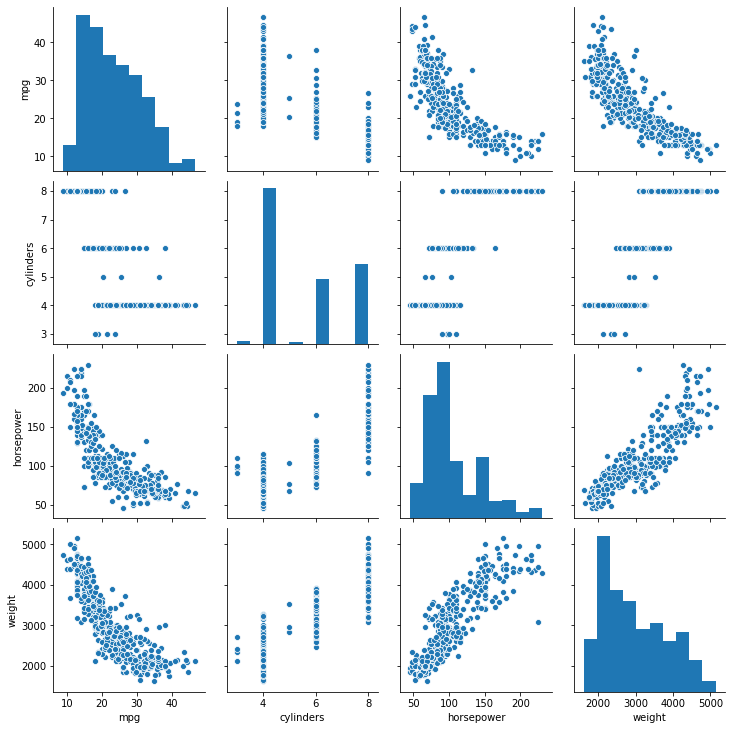

In [3]:
# seaborn pairplot으로 두 변수 간의 모든 경우의 수 그리기
sns.pairplot(ndf)
plt.show()
plt.close()

In [4]:
#속성(변수) 선택
X = ndf[['weight']] #독립변수 X
y = ndf['mpg']      #종속변수 Y

# train data 와 test data로 구분(7:3) 비율
from sklearn.model_selection import train_test_split

#이 함수를 이용해서 트레인 셋을 얻는다.
X_train, X_test, y_train, y_test = train_test_split(X,                 #독립변수
                                                   y,                  #종속변수
                                                   test_size=0.3,      #테스트 값 비율
                                                   random_state=10)    #랜덤 추출 값

print('train data 개수:', len(X_train))
print()
print('test data 개수:', len(X_test))

train data 개수: 273

test data 개수: 118


In [5]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression   # 알고리즘(단순선형회귀) 임포트

# 단순회귀분석 모형 객체 생성 (Simple Linear Regression) - 상황에 따라 알맞는 모델을 사용해야 한다.
lr = LinearRegression()

# train data를 가지고 모형 학습
lr.fit(X_train, y_train) # 학습용 데이터로 fit 시킨다(학습시킨다). 독립변수와 종속변수를 이용하여 학습
# 학습을 해서 오차를 최소로 하는 y=ax+b 에서 a, b를 찾아준다.
# 학습된 데이터는 lr에 저장

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 결정계수 값이 클수록 모형의 예측 성능이 좋다고 판단
# 회귀모델에 대한 평가 : MSE, RMSE, R_Square

r_square = lr.score(X_test, y_test) # score를 통해 점수를 계산해서 정확도 검증(검증용 데이터를 넣어서 검증)
print(r_square) # 이 모델에서는 r스퀘어를 사용한다. (설명력이 얼마나 있는지 판단.- 비교적 간단하기 때문에 r_square 사용.)
# 분산의 크기를 가지고 평가.

0.7035812683047353


In [7]:
# 회귀식의 기울기
print('기울기 a:', lr.coef_)
print()

# 회귀식의 y절편
print('y절편 b:', lr.intercept_)
print()

# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
y_hat = lr.predict(X) # lr을 이용해서 X를 대입했을 때 예측
type(y_hat)

기울기 a: [-0.00770318]

y절편 b: 46.60392617148081



numpy.ndarray

pandas.core.series.Series

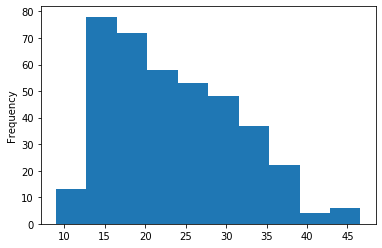

In [8]:
y.plot(kind='hist')          # y값에 대한 히스토그램 (실제 y값) y=ndf['mpg']
type(y)

<class 'pandas.core.series.Series'>


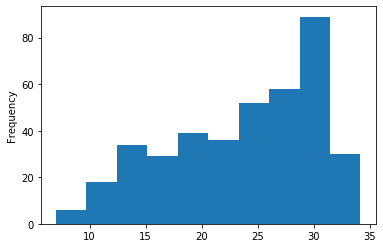

In [9]:
y_hat = pd.Series(y_hat)
print(type(y_hat))
y_hat.plot(kind='hist')  # 실제 분포(y)하고 예측해서 나온 값(y_hat)을 비교

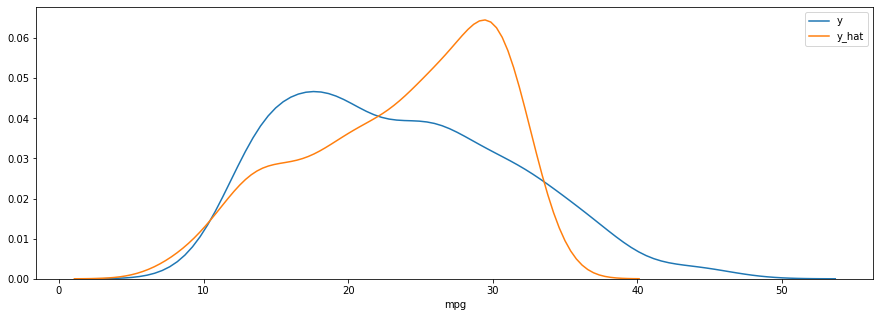

In [10]:
# 실제 값은 왼쪽으로 편향되어 있고 예측값은 반대로 오른쪽으로 편중되는 경향을 보임.
# 모형의 모차를 줄일 필요가 있어 보임.
plt.figure(figsize=(15,5))
ax1 = sns.distplot(y, hist=False, label='y')
# ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')
plt.show()
plt.close()

### 다항 회귀분석
 - 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
 - 2차 함수 이상의 다항 함수를 이용하여 두 변수 간의 선형관계를 설명화는 알고리즘
 - 다항 회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관

In [11]:
df = pd.read_pickle('auto-mpg.pkl')
#분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,15.0,8,165.0,3693.0
1,18.0,8,150.0,3436.0
2,16.0,8,150.0,3433.0
3,17.0,8,140.0,3449.0
4,15.0,8,198.0,4341.0


In [12]:
#속성(변수) 선택
X = ndf[['weight']] #독립변수 X , 데이터프레임형태로 저장
y = ndf['mpg']      #종속변수 y, 시리즈 형태로 저장

# train data 와 test data로 구분(7:3) 비율
from sklearn.model_selection import train_test_split

#이 함수를 이용해서 트레인 셋을 얻는다.
X_train, X_test, y_train, y_test = train_test_split(X,                 #독립변수
                                                   y,                  #종속변수
                                                   test_size=0.3,      #테스트 값 비율
                                                   random_state=10)    #랜덤 추출 값

print('훈련데이터 : ', X_train.shape)
print('검증데이터 : ', X_test.shape)
print('훈련데이터 : ', y_train.shape)
print('검증데이터 : ', y_test.shape)
X_train.head()

훈련데이터 :  (273, 1)
검증데이터 :  (118, 1)
훈련데이터 :  (273,)
검증데이터 :  (118,)


,weight
276,3410.0
282,3265.0
356,2615.0
341,2385.0
289,4054.0


In [13]:
# 다항회귀분석 모형 - sklearn 사용

# sklearn 라이브러리에서 필요한 모듈 가져오기
from sklearn.linear_model import LinearRegression      #선형 회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

# 다항식 변환
poly = PolynomialFeatures(degree=2)         #2차항 적용, 객체 생성
X_train_poly = poly.fit_transform(X_train)  #X_train 데이터를 2차항으로 변형(단항 -> 다항으로 바꾸는 기능)

print('원 데이터:', X_train.shape)
print('2차항 변환 데이터:', X_train_poly.shape)
X_train_poly

원 데이터: (273, 1)
2차항 변환 데이터: (273, 3)


array([[1.0000000e+00, 3.4100000e+03, 1.1628100e+07],
       [1.0000000e+00, 3.2650000e+03, 1.0660225e+07],
       [1.0000000e+00, 2.6150000e+03, 6.8382250e+06],
       [1.0000000e+00, 2.3850000e+03, 5.6882250e+06],
       [1.0000000e+00, 4.0540000e+03, 1.6434916e+07],
       [1.0000000e+00, 2.2100000e+03, 4.8841000e+06],
       [1.0000000e+00, 2.9010000e+03, 8.4158010e+06],
       [1.0000000e+00, 2.1640000e+03, 4.6828960e+06],
       [1.0000000e+00, 3.1580000e+03, 9.9729640e+06],
       [1.0000000e+00, 4.0800000e+03, 1.6646400e+07],
       [1.0000000e+00, 1.9400000e+03, 3.7636000e+06],
       [1.0000000e+00, 2.0030000e+03, 4.0120090e+06],
       [1.0000000e+00, 2.4050000e+03, 5.7840250e+06],
       [1.0000000e+00, 2.5750000e+03, 6.6306250e+06],
       [1.0000000e+00, 4.2090000e+03, 1.7715681e+07],
       [1.0000000e+00, 2.9450000e+03, 8.6730250e+06],
       [1.0000000e+00, 2.6780000e+03, 7.1716840e+06],
       [1.0000000e+00, 1.9650000e+03, 3.8612250e+06],
       [1.0000000e+00, 2.200

In [14]:
# train data를 가지고 모형 학습
pr = LinearRegression()
pr.fit(X_train_poly, y_train) #다항으로 바꿔준 데이터로 학습을 시킨다.
# 다항으로 바꾼 독립변수들과, 학습한 y값으로 학습시킨다. (선형회귀법을 사용)
# pr에 학습된 모델이 적용된 상태

# 학습을 마친 모형에 test data를 적용하여 결정계수(R-제곱) 계산
# 설계한 모형의 오차가 작다면 R-square가 커지고, 설계한 모형의 오차가 크다면 R-square

X_test_poly = poly.fit_transform(X_test)
r_square = pr.score(X_test_poly, y_test) # 학습된 모델을 가지고 스코어링 할 수 있다.(설명력 점수 평가)
print(r_square) # 3% 값이 개선된 것을 확인할 수 있다.

0.7337822241594427


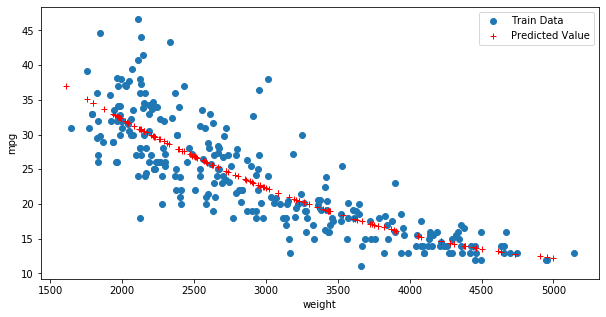

In [15]:
# train data의 산점도와 test data로 예측한

y_hat_test = pr.predict(X_test_poly) # 다항으로 바꾼 검증용 데이터를 가지고 예측한 값을 y_hat_test에 저장

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1) # 하나의 그래프를 만들어준다.
ax.plot(X_train, y_train, 'o', label='Train Data') # 데이터 분포 # 학습용 데이터를 그래프로 그려준다.
ax.plot(X_test, y_hat_test, 'r+', label = 'Predicted Value') #모형이 학습한 회귀선, 
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

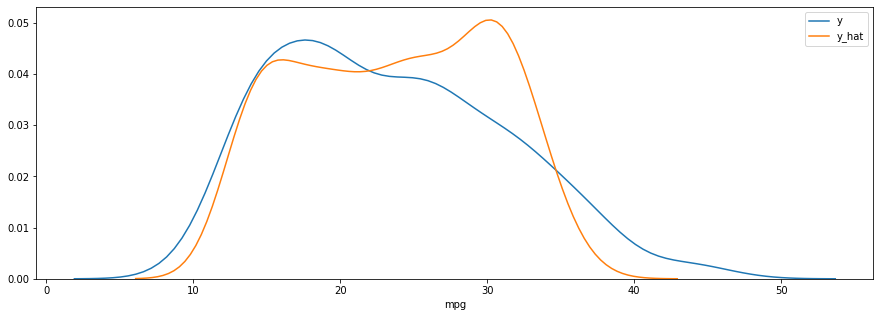

In [16]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
# 단순 회귀분석 결과와 비교하면 데이터가 어느 한쪽으로 편향되는 경향이 상당히 감소한 것을 확인
X_poly = poly.fit_transform(X)
y_hat = pr.predict(X_poly)

plt.figure(figsize=(15,5))
ax1 = sns.distplot(y, hist=False, label='y') # 히스토그램을 보여줄지 말지 선택(True, False)
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)
plt.show()
plt.close()

### 회귀 평가 지표
 - MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
    (절대값으로 하는 것)
 - MSE : 실제값과 예측값의 차이를 제곱해 평균한 것 
    (스퀘어 해서 처리)
 - RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것 보정)
    (스퀘어를 하니까 다시 루트를 씌운다.)
 - R square : 분산 기반으로 예측 성능을 평가, 실제 값의 분산 대비 예측값의 분산 비율을 지표로 함
    (분산값으로 해서 설명력을 높여주는 것)

### 분류 - KNN
 - KNN : k-Nearest-Neighbors의 약칭. 새로운 관측값이 주어지면 가장 속성이 비슷한 이웃을 먼저 찾음
 - 가까운 목표 값과 같은 값으로 분류하여 예측
 - k값에 따라 예측의 정확도가 달라지므로 적절한 k값을 찾는 것이 중요
 - ★가까운 것 부터 찾고, 범위를 넓혀가며 값을 찾음. 이 때, 다수결에 의해 수가 많은 그룹을 선택하여 묶인다.

### 분류 - SVM
 - Margin이란 선과 가장 가까운 양 옆 데이터와의 거리
 - 선과 가장 가까운 포인트를 서포트 벡터(Support vector)
 - 데이터를 정확히 분류하는 범위를 먼저 찾고, 그 범위 안에서 Margin을 최대화하는 구분선을 선택
 - 로버스트 하다는 것은 아웃라이어(outlier)의 영향을 받지 않는다는 의미
 - 어느 정도 outlier를 무시하고 최적의 구분선
 
 - (가운데를 기준으로 나눴을 때, 나눈  선을 기준으로 데이터와의 거리가 '서포트 벡터'라고 한다)
 - (나눈다고 하더라고 그 기준을 벗어나는 것들이 존재, 이것이 아웃라이어. 이 때, 로버스트하여 아웃라이어의 영향을 받지 않는다.)

### 분류 - Decision Tree
 - Decision Tree : 의사결정 나무라는 의미. 트리 구조를 사용, 각 분기점(node) 에는 분석 대상의 속성들이 위치
   - 각 분기점마다 목표 값을 잘 분류할 수 있는 속성을 찾아서 배치
   - 해당 속성이 갖느 값을 이용하여 새로운 가지(branch)를 만듦
   - 최적의 속성을 선택할 때는 다른 종류의 값들이 섞여 있는 정도를 나타내는 Entropy를 주로 활용
   - Entropy가 낮을 수록 분류가 잘 된 것임

### 분류 - Logistic Regression
 - 분류에 사용하는 회귀분석 종속변수가 범주형이면서 0, 1
 - 일반 회귀모형을 로짓 변환
 - Odds ratio : 실패에 비해 성공할 확률 p/(1-p)
 - Logit : Odds에 log를 취한 것

### 분류 - Random Forest
 - 하나의 알고리즘 사용
 - 학습 데이터셋을 랜덤하게 추출하여 모델을 학습
 - 투표방식으로 최빈값으로 결정
 - 배깅 : 학습 데이터에서 랜덤하게 추출 시 중복 허용

In [41]:
from sklearn.tree import DecisionTreeClassifier # 분류기
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# 붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
display(iris_data.keys())  # columns 값을 볼 수 있다. (feature는 독립변수를 의미)
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,
                                                    iris_data.target,
                                                    test_size=0.2,        # 8:2 로 나누니까 0.2로 놔준다.   
                                                    random_state=11)

print(iris_data.feature_names)
print(iris_data.target_names)

# DecisionTree Claaifier 생성
# dt_clf = DecisionTreeClassifier(random_state=156) # 아무 제약을 걸지 않은 기본
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, random_state=156)    # max_depth = 2 는 두번째 단계까지만 만든다.
# dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=156)
# dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=156)

# criterion='gini' or criterion='entropy' 가능

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)       # 학습용 데이터로 학습을 시킨다. dt_clf는 학습된 모델이 된다.
y_hat = dt_clf.predict(X_test)     # 학습된 모델(dt_clf)을 토대로 예측(검증 평가용 X_test 데이터를 이용)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


### Dicision Tree 파라미터
 - max_depth : 트리의 최대 깊이 ( 5 단계로 찢어지는것은 max_depth = 5 이다.)
 - max_features : 최적의 분할을 위해 고려할 최대 피처 개수
 - max_leaf_nodes : 말단 노드의 최대 개수
 - min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터, 디폴트 2. 작게 설정할 수록 분할되는 노드 증가, 과적합 가능성 증가
 - min_samples_leaf : 말단 노드가 되기 위한 최소한의 샘플 데이터

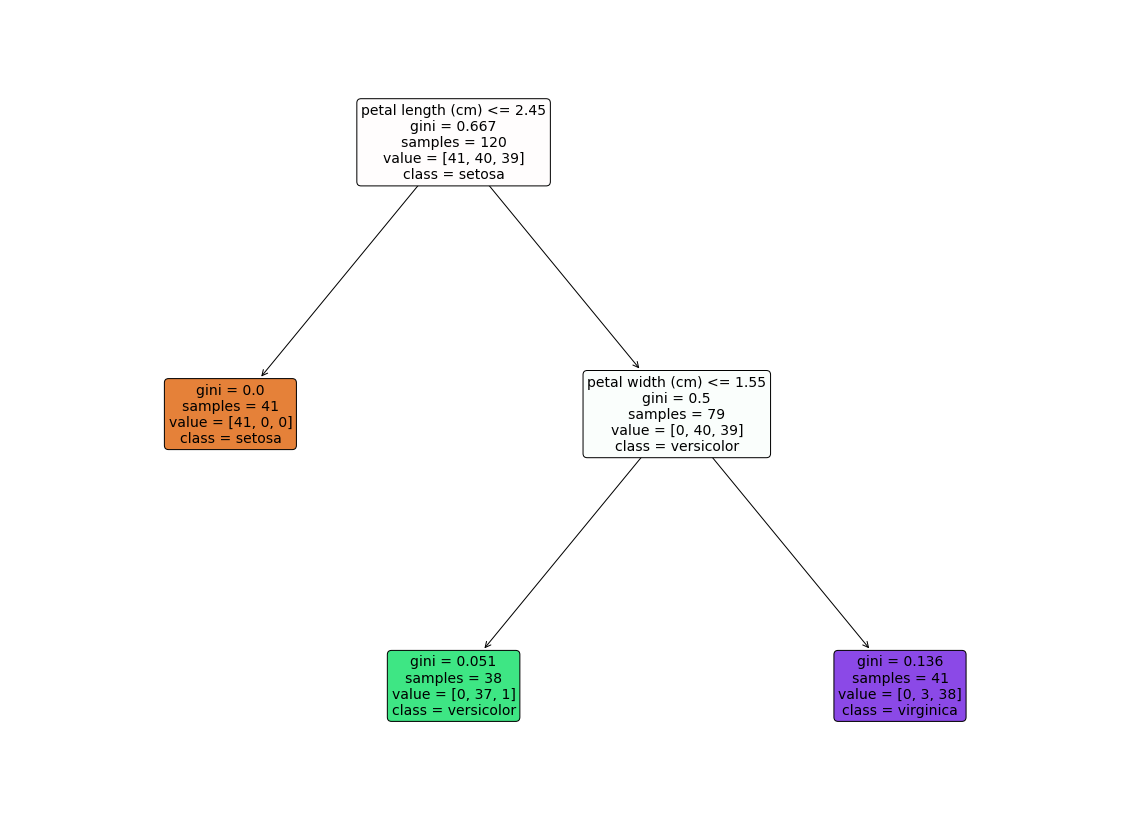

In [43]:
# DT 시각화
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,15))
tree.plot_tree(dt_clf, filled=True,                       # 그림을 그린다.
              feature_names=iris_data.feature_names,       # iris_data가 가지고 있는 데이터를 입력한다. 
              class_names=iris_data.target_names,          # iris_data가 가지고 있는 데이터를 입력한다. 
              rounded=True, fontsize=14)                  # 사각형의 모서리 라운드처리, 글자 사이즈
plt.show()
plt.close()
# petal length <= 2.45 : 가장 중요한 분류 기준
# petal width <= 1.55 기준 : 두 번째 분류 기준
# 완전히 분리되는 것은 gini(불순도) = 0.0 이다.
# entropy 를 통해 모두가 gini = 0.0 이 될 때 까지
# 계속 가지치기를 해서 제일 밑에부분까지 내려가서 너무 미세한부분까지 맞춰지면 일반화된것을 예측하기 어려움
# --> 차원의 저주
# --> 일반화된 예측 모델을 만들어야 한다.
# 성능이 부족함(정확도)에도 많이 사용한다. 내부 처리 데이터를 쉽게 확인할 수 있는 장점이 존재.

In [49]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 15)
titanic_df=pd.read_csv('titanic3.csv')

from sklearn.preprocessing import LabelEncoder
# Null 처리 함수
def fillna(df):
    df['age'].fillna(df['age'].mean(), inplace=True)
    df['cabin'].fillna('N', inplace=True)
    df['fare'].fillna(df['fare'].mean(), inplace=True)
    df['embarked'].fillna('N', inplace=True)
    return df

def drop_features(df):
    df.drop(['home.dest','boat','body','name','ticket'], axis=1, inplace=True)
    return df

def format_features(df):
    df['cabin'] = df['cabin'].str[:1]
    features = ['cabin','sex','embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

t_df = transform_features(titanic_df)
display(t_df.head())
display(t_df.columns.values)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked
0,1,1,0,29.00,0,0,211.3375,1,3
1,1,1,1,0.92,1,2,151.5500,2,3
2,1,0,0,2.00,1,2,151.5500,2,3
3,1,0,1,30.00,1,2,151.5500,2,3
4,1,0,0,25.00,1,2,151.5500,2,3


array(['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'cabin', 'embarked'], dtype=object)

In [61]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
X = t_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin', 'embarked']]
y = t_df['survived']

# 독립변수 정규화(평균 0, 분산1인 표준정규분포)
X = preprocessing.StandardScaler().fit(X).transform(X) # StandardScaler : 표준정규분포

# 학습용 데이터와 평가용 데이터를 8:2로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape) # (1047, 8) 80% 데이터 갯수
print(X_test.shape) # (262, 8) 20% 데이터 갯수
print()
print(X.mean())  # -4.885320566723378e-17 (0.0 이 17개 있어서 거의 0이라고 보면 된다.)-> 평균 = 0
print(X.std())   # 1.0 표준편차 
print(type(y_test)) # <class 'pandas.core.series.Series'>

(1047, 8)
(262, 8)

-4.885320566723378e-17
1.0
<class 'pandas.core.series.Series'>


In [109]:
# Decision Tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()  # 객체 생성
dt_model.fit(X_train, y_train)       # 트레이닝 데이터로 학습
dt_pred = dt_model.predict(X_test)   # 검증용 데이터로 예측

print(dt_pred[0:10])
print(y_test.values[0:10])

accuracy = accuracy_score(y_test, dt_pred)
print('dt 예측 정확도:',accuracy) # 예측 정확도가 좋지 못하면 재개발 해야함
# 분석용 데이터셋을 잘 만들어서, 중요한 변수들을 뽑아내야 함.

[0 1 0 0 0 0 0 1 0 0]
[1 0 0 1 0 0 0 1 1 0]
dt 예측 정확도: 0.7404580152671756
